# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [81]:
F_abalone = abalone[abalone["sex"]=="F"]
M_abalone = abalone[abalone["sex"]=="M"]
I_abalone = abalone[abalone["sex"]=="I"]

In [82]:
F_abalone_avg = F_abalone.groupby("age").mean()
M_abalone_avg = M_abalone.groupby("age").mean()
I_abalone_avg = I_abalone.groupby("age").mean()


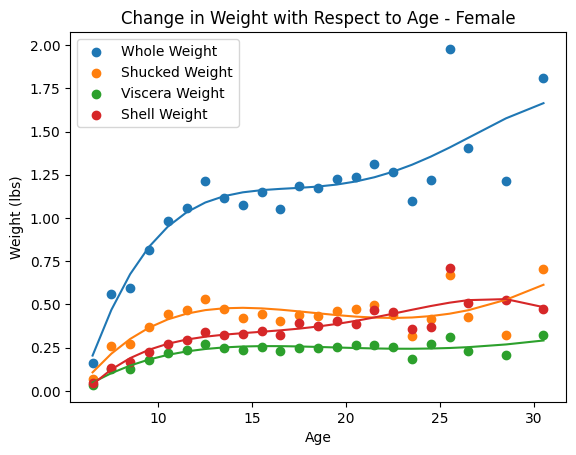

In [83]:
plt.scatter(F_abalone_avg.index, F_abalone_avg["whole_wt"],label = "Whole Weight" )
plt.scatter(F_abalone_avg.index, F_abalone_avg["shucked_wt"],label = "Shucked Weight" )
plt.scatter(F_abalone_avg.index, F_abalone_avg["viscera_wt"],label = "Viscera Weight" )
plt.scatter(F_abalone_avg.index, F_abalone_avg["shell_wt"],label = "Shell Weight" )

trend_ww = np.polyfit(F_abalone_avg.index, F_abalone_avg["whole_wt"],4)
trendpoly_ww = np.poly1d(trend_ww)
plt.plot(F_abalone_avg.index, trendpoly_ww(F_abalone_avg.index))

trend_sw = np.polyfit(F_abalone_avg.index, F_abalone_avg["shucked_wt"],4)
trendpoly_sw = np.poly1d(trend_sw)
plt.plot(F_abalone_avg.index, trendpoly_sw(F_abalone_avg.index))

trend_vw = np.polyfit(F_abalone_avg.index, F_abalone_avg["viscera_wt"],4)
trendpoly_vw = np.poly1d(trend_vw)
plt.plot(F_abalone_avg.index, trendpoly_vw(F_abalone_avg.index))

trend_shw = np.polyfit(F_abalone_avg.index, F_abalone_avg["shell_wt"],4)
trendpoly_shw = np.poly1d(trend_shw)
plt.plot(F_abalone_avg.index, trendpoly_shw(F_abalone_avg.index))


plt.xlabel("Age")
plt.ylabel("Weight (lbs)")
plt.title("Change in Weight with Respect to Age - Female")
plt.legend()
#F_abalone_avg

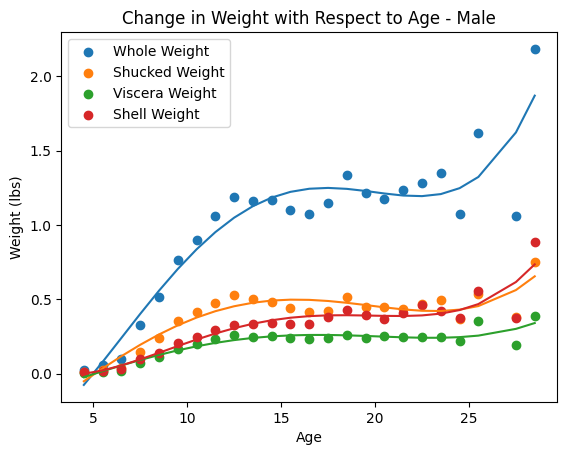

In [84]:
plt.scatter(M_abalone_avg.index, M_abalone_avg["whole_wt"],label = "Whole Weight" )
plt.scatter(M_abalone_avg.index, M_abalone_avg["shucked_wt"],label = "Shucked Weight" )
plt.scatter(M_abalone_avg.index, M_abalone_avg["viscera_wt"],label = "Viscera Weight" )
plt.scatter(M_abalone_avg.index, M_abalone_avg["shell_wt"],label = "Shell Weight" )

M_trend_ww = np.polyfit(M_abalone_avg.index, M_abalone_avg["whole_wt"],4)
M_trendpoly_ww = np.poly1d(M_trend_ww)
plt.plot(M_abalone_avg.index, M_trendpoly_ww(M_abalone_avg.index))

M_trend_sw = np.polyfit(M_abalone_avg.index, M_abalone_avg["shucked_wt"],4)
M_trendpoly_sw = np.poly1d(M_trend_sw)
plt.plot(M_abalone_avg.index, M_trendpoly_sw(M_abalone_avg.index))

M_trend_vw = np.polyfit(M_abalone_avg.index, M_abalone_avg["viscera_wt"],4)
M_trendpoly_vw = np.poly1d(M_trend_vw)
plt.plot(M_abalone_avg.index, M_trendpoly_vw(M_abalone_avg.index))

M_trend_shw = np.polyfit(M_abalone_avg.index, M_abalone_avg["shell_wt"],4)
M_trendpoly_shw = np.poly1d(M_trend_shw)
plt.plot(M_abalone_avg.index, M_trendpoly_shw(M_abalone_avg.index))

plt.xlabel("Age")
plt.ylabel("Weight (lbs)")
plt.title("Change in Weight with Respect to Age - Male")

plt.legend()

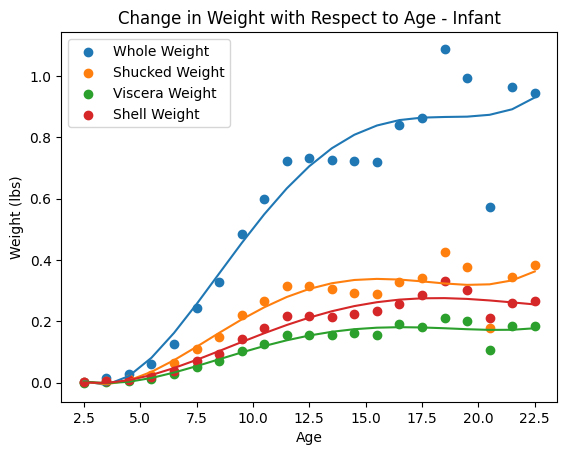

In [85]:
plt.scatter(I_abalone_avg.index, I_abalone_avg["whole_wt"],label = "Whole Weight" )
plt.scatter(I_abalone_avg.index, I_abalone_avg["shucked_wt"],label = "Shucked Weight" )
plt.scatter(I_abalone_avg.index, I_abalone_avg["viscera_wt"],label = "Viscera Weight" )
plt.scatter(I_abalone_avg.index, I_abalone_avg["shell_wt"],label = "Shell Weight" )

I_trend_ww = np.polyfit(I_abalone_avg.index, I_abalone_avg["whole_wt"],4)
I_trendpoly_ww = np.poly1d(I_trend_ww)
plt.plot(I_abalone_avg.index, I_trendpoly_ww(I_abalone_avg.index))

I_trend_sw = np.polyfit(I_abalone_avg.index, I_abalone_avg["shucked_wt"],4)
I_trendpoly_sw = np.poly1d(I_trend_sw)
plt.plot(I_abalone_avg.index, I_trendpoly_sw(I_abalone_avg.index))

I_trend_vw = np.polyfit(I_abalone_avg.index, I_abalone_avg["viscera_wt"],4)
I_trendpoly_vw = np.poly1d(I_trend_vw)
plt.plot(I_abalone_avg.index, I_trendpoly_vw(I_abalone_avg.index))

I_trend_shw = np.polyfit(I_abalone_avg.index, I_abalone_avg["shell_wt"],4)
I_trendpoly_shw = np.poly1d(I_trend_shw)
plt.plot(I_abalone_avg.index, I_trendpoly_shw(I_abalone_avg.index))


plt.xlabel("Age")
plt.ylabel("Weight (lbs)")
plt.title("Change in Weight with Respect to Age - Infant")
plt.legend()

In [86]:
abalone["sex"]=abalone["sex"].replace(["F", "M", "I"], [0,1,2])

In [87]:
y=abalone["age"].values
X = abalone.drop(["age","rings"],axis=1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state =42)

In [90]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.3), "Lasso": Lasso(alpha=0.3), "DecisionTreeRegressor":DecisionTreeRegressor(), "RandomForest":RandomForestRegressor(),"XGBoostRegressor":XGBRegressor()}
results = []
for model in models.values():
    kf = KFold()
    cv_scores = cross_val_score(model,X_train, y_train, cv=kf)
    results.append(cv_scores)


In [91]:
model_performance = pd.DataFrame(results)
model_performance = model_performance.transpose()
model_performance.columns = models.keys()
model_performance




,Linear Regression,Ridge,Lasso,DecisionTreeRegressor,RandomForest,XGBoostRegressor
0,0.508593,0.504439,0.262108,0.125495,0.512898,0.447181
1,0.524589,0.522523,0.256442,0.267243,0.567189,0.514002
2,0.445700,0.514313,0.278176,0.164980,0.544800,0.514890
3,0.575177,0.572781,0.273487,0.137813,0.558374,0.525501
4,0.506657,0.505186,0.261847,0.069428,0.516880,0.476311


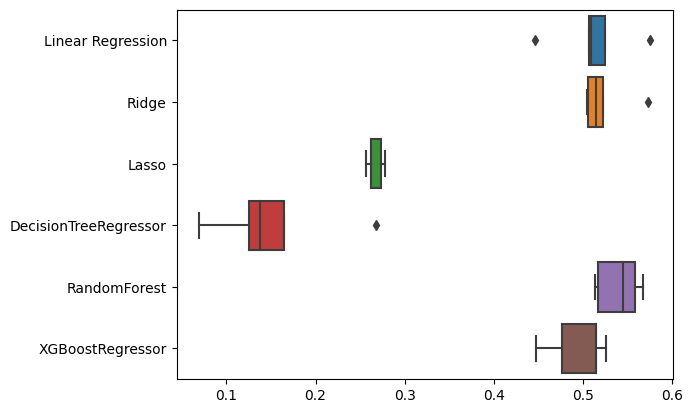

In [92]:
sns.boxplot(data = model_performance, orient ='h')
plt.show()

In [93]:
#Our top three performing models are RandomForest, Linear Regression, and Ridge, and have similar results. We will evaluate their RMSE against the test set to determine which model we will move forward with. 



In [94]:
lst_model= ["Linear Regression", "Ridge", "RandomForest"]
top_models= {key:models[key] for key in lst_model }
feature_importance ={}
for name, model in top_models.items():
    features = []
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = MSE(y_test,y_pred, squared=False)
    if name != "RandomForest":
        feature_importance[name] = model.coef_
    else:
        feature_importance[name]= model.feature_importances_
    print("{} Test Set RMSE: {}".format(name,test_rmse))

Linear Regression Test Set RMSE: 2.1989073584591456
Ridge Test Set RMSE: 2.196410055451006
RandomForest Test Set RMSE: 2.1894022146276066


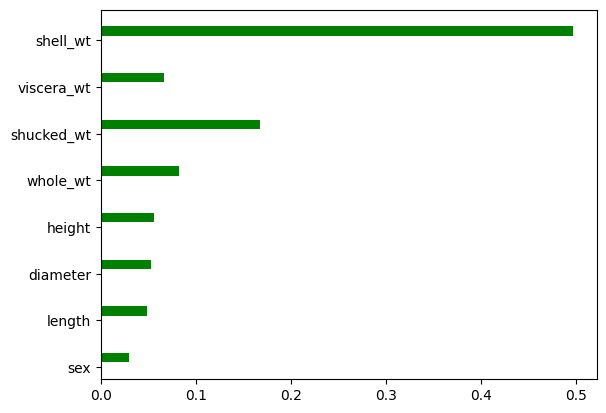

In [95]:
#feature_importance
y= np.arange(8)
plt.barh(x+0.2, feature_importance["RandomForest"], .2, color='green')
plt.yticks(y, X_test.columns)

plt.show()